##**1. Data Cleaning**

    IMPORTING THE RELEVANT LIBRARIES

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Importing the necessary functions and modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Importing the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA



DATA ASLI

In [15]:
# Load dataset and create a DataFrame
# Specify the file path of the CSV file
file_path = "C:/Users/pingk/OneDrive - Chulalongkorn University/Documents/mekargit/zaytalnakhil-1/20240429_databasah_csv.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame only 6 first row (use head for the first 6 rows, and tail for the last 6 rows)
df.head(6)


C:\Users\pingk\AppData\Local\Temp\ipykernel_22152\1662164226.py:6: DtypeWarning: Columns (3367,3369) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Datapoints,3225.795591,3226.297348,3226.799261,3227.30133,3227.803556,3228.305938,3228.808476,3229.311171,3229.814022,...,countrycode,countrytarget,provincecode,yymm,yy,mm,ftirrun_yyyy,ftirrun_mmm,ftirrun_m,ftirrun_yymm
0,absorbance_Fri Mar 08 10_46_59 2024_TH-CPN-005...,0.004393,0.004496,0.004647,0.004797,0.004890,0.004878,0.004733,0.004461,0.004096,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
1,absorbance_Fri Mar 08 10_49_06 2024_TH-CPN-005...,0.004996,0.005020,0.005068,0.005098,0.005065,0.004930,0.004673,0.004306,0.003863,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
2,absorbance_Fri Mar 08 10_50_57 2024_TH-CPN-005...,0.003594,0.003403,0.003151,0.002869,0.002573,0.002268,0.001962,0.001675,0.001440,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
3,absorbance_Fri Mar 08 10_51_30 2024_TH-CPN-005...,0.004154,0.004115,0.003974,0.003771,0.003545,0.003316,0.003093,0.002885,0.002702,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
4,absorbance_Fri Mar 08 10_52_01 2024_TH-CPN-005...,0.004019,0.003930,0.003819,0.003692,0.003547,0.003379,0.003192,0.002997,0.002818,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
5,absorbance_Fri Mar 08 10_52_43 2024_TH-CPN-005...,0.005993,0.005933,0.005833,0.005723,0.005619,0.005523,0.005431,0.005343,0.005266,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403


In [16]:
# Display the missing values in the DataFrame
df.isnull().sum()


Datapoints      0
3225.795591     0
3226.297348     0
3226.799261     0
3227.30133      0
               ..
mm              0
ftirrun_yyyy    0
ftirrun_mmm     0
ftirrun_m       0
ftirrun_yymm    0
Length: 3374, dtype: int64

In [17]:
# Display the data types of the columns in the DataFrame
df.dtypes

Datapoints       object
3225.795591     float64
3226.297348     float64
3226.799261     float64
3227.30133      float64
                 ...   
mm               object
ftirrun_yyyy      int64
ftirrun_mmm      object
ftirrun_m         int64
ftirrun_yymm      int64
Length: 3374, dtype: object

In [18]:
# Display data description
df.describe(include='all')


,Datapoints,3225.795591,3226.297348,3226.799261,3227.30133,3227.803556,3228.305938,3228.808476,3229.311171,3229.814022,...,countrycode,countrytarget,provincecode,yymm,yy,mm,ftirrun_yyyy,ftirrun_mmm,ftirrun_m,ftirrun_yymm
count,1869,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,...,1869,1869.000000,1869,1869.0,1869.000000,1869.0,1869.000000,1869,1869.000000,1869.000000
unique,1869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,29,22.0,NaN,18.0,NaN,3,NaN,NaN
top,absorbance_Fri Mar 08 10_46_59 2024_TH-CPN-005...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TH,NaN,SNI,2312.0,NaN,12.0,NaN,Mar,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1125,NaN,335,536.0,NaN,536.0,NaN,1383,NaN,NaN
mean,NaN,0.001674,0.001679,0.001689,0.001700,0.001713,0.001726,0.001738,0.001748,0.001755,...,NaN,0.431782,NaN,NaN,22.980738,NaN,2023.841091,NaN,3.895666,2388.004815
std,NaN,0.003487,0.003489,0.003478,0.003457,0.003428,0.003394,0.003360,0.003329,0.003303,...,NaN,0.559401,NaN,NaN,1.525533,NaN,0.365689,NaN,1.809246,34.785662
min,NaN,-0.050460,-0.050317,-0.049868,-0.049178,-0.048354,-0.047510,-0.046745,-0.046119,-0.045645,...,NaN,0.000000,NaN,NaN,20.000000,NaN,2023.000000,NaN,3.000000,2308.000000
25%,NaN,0.000638,0.000639,0.000624,0.000645,0.000660,0.000676,0.000692,0.000724,0.000754,...,NaN,0.000000,NaN,NaN,23.000000,NaN,2024.000000,NaN,3.000000,2403.000000
50%,NaN,0.002041,0.002050,0.002026,0.002025,0.002014,0.002001,0.001985,0.001984,0.001989,...,NaN,0.000000,NaN,NaN,23.000000,NaN,2024.000000,NaN,3.000000,2403.000000
75%,NaN,0.003053,0.003077,0.003056,0.003076,0.003085,0.003111,0.003100,0.003103,0.003112,...,NaN,1.000000,NaN,NaN,23.000000,NaN,2024.000000,NaN,4.000000,2403.000000


In [6]:
# Drop columns that are not needed
df_new = df.drop(['Data_points',
                    'Sample Code', 
                    'LEFT_Formula', 
                    'Province', 
                    'Sample_Code_with_Formula', 
                    'LEFT_Formula_with_SC_Formula', 
                    'Rainfall_Group_Yuni'],
                    axis=1)
df_new

,525.5073,525.9894,526.4715,526.9536,527.4357,527.9178,528.4,528.8821,529.3642,529.8463,...,3096.154,3096.636,3097.118,3097.6,3098.082,3098.564,3099.046,3099.528,Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated,RG_yuni_mix
0,0.089236,0.101721,0.107583,0.104697,0.093445,0.075911,0.055013,0.034083,0.016262,0.004363,...,0.045484,0.045510,0.045536,0.045574,0.045642,0.045751,0.045899,0.046061,2718.5,4
1,0.035707,0.035964,0.037096,0.038216,0.040908,0.043613,0.044568,0.045519,0.046563,0.047675,...,0.075520,0.075461,0.075293,0.075028,0.074692,0.074320,0.073956,0.073648,2718.5,4
2,0.098685,0.098417,0.092639,0.083412,0.073728,0.066074,0.061816,0.060799,0.061555,0.061865,...,0.069058,0.068920,0.068744,0.068545,0.068352,0.068203,0.068137,0.068183,2718.5,4
3,0.064316,0.064867,0.063026,0.061954,0.062276,0.062738,0.063090,0.064550,0.065881,0.065645,...,0.078322,0.078228,0.078078,0.077914,0.077770,0.077660,0.077577,0.077502,2718.5,4
4,0.089236,0.101721,0.107583,0.104697,0.093445,0.075911,0.055013,0.034083,0.016262,0.004363,...,0.045484,0.045510,0.045536,0.045574,0.045642,0.045751,0.045899,0.046061,2718.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.039939,0.040777,0.038789,0.035498,0.030210,0.028826,0.026949,0.025288,0.023511,0.020996,...,0.030949,0.030886,0.030791,0.030674,0.030550,0.030437,0.030350,0.030300,5529.9,5
265,0.012959,0.028690,0.043367,0.054176,0.060135,0.061944,0.061242,0.059887,0.059198,0.059613,...,0.070656,0.070629,0.070499,0.070285,0.070021,0.069749,0.069508,0.069331,5529.9,5
266,0.068718,0.072964,0.071365,0.067697,0.062836,0.058891,0.056937,0.055841,0.054611,0.052147,...,0.047425,0.047390,0.047332,0.047262,0.047189,0.047112,0.047026,0.046928,5529.9,5
267,0.049185,0.052138,0.050455,0.046468,0.041365,0.035280,0.029439,0.025038,0.022264,0.020955,...,0.025385,0.025528,0.025653,0.025752,0.025825,0.025875,0.025907,0.025920,5529.9,5


In [7]:
# Display the values of the new DataFrame
df_new.head()

,525.5073,525.9894,526.4715,526.9536,527.4357,527.9178,528.4,528.8821,529.3642,529.8463,...,3096.154,3096.636,3097.118,3097.6,3098.082,3098.564,3099.046,3099.528,Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated,RG_yuni_mix
0,0.089236,0.101721,0.107583,0.104697,0.093445,0.075911,0.055013,0.034083,0.016262,0.004363,...,0.045484,0.045510,0.045536,0.045574,0.045642,0.045751,0.045899,0.046061,2718.5,4
1,0.035707,0.035964,0.037096,0.038216,0.040908,0.043613,0.044568,0.045519,0.046563,0.047675,...,0.075520,0.075461,0.075293,0.075028,0.074692,0.074320,0.073956,0.073648,2718.5,4
2,0.098685,0.098417,0.092639,0.083412,0.073728,0.066074,0.061816,0.060799,0.061555,0.061865,...,0.069058,0.068920,0.068744,0.068545,0.068352,0.068203,0.068137,0.068183,2718.5,4
3,0.064316,0.064867,0.063026,0.061954,0.062276,0.062738,0.063090,0.064550,0.065881,0.065645,...,0.078322,0.078228,0.078078,0.077914,0.077770,0.077660,0.077577,0.077502,2718.5,4
4,0.089236,0.101721,0.107583,0.104697,0.093445,0.075911,0.055013,0.034083,0.016262,0.004363,...,0.045484,0.045510,0.045536,0.045574,0.045642,0.045751,0.045899,0.046061,2718.5,4


In [8]:
# Display data information
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Columns: 3620 entries, 525.5073 to RG_yuni_mix
dtypes: float64(3619), int64(1)
memory usage: 7.4 MB


##**2. Data Correlation**

In [9]:
# Display the number of unique values in the DataFrame
df_new.nunique()

525.5073                                                      263
525.9894                                                      253
526.4715                                                      258
526.9536                                                      265
527.4357                                                      266
                                                             ... 
3098.564                                                      267
3099.046                                                      266
3099.528                                                      266
Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated     16
RG_yuni_mix                                                     5
Length: 3620, dtype: int64

In [10]:
# Display data correlation
df_new.corr()

,525.5073,525.9894,526.4715,526.9536,527.4357,527.9178,528.4,528.8821,529.3642,529.8463,...,3096.154,3096.636,3097.118,3097.6,3098.082,3098.564,3099.046,3099.528,Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated,RG_yuni_mix
525.5073,1.000000,0.984850,0.951897,0.904419,0.846604,0.784231,0.722336,0.663168,0.605462,0.550810,...,-0.129419,-0.128749,-0.128141,-0.127653,-0.127315,-0.127121,-0.127040,-0.127023,0.023533,0.023534
525.9894,0.984850,1.000000,0.988601,0.954534,0.900829,0.837189,0.769013,0.700801,0.632166,0.565714,...,-0.113221,-0.112477,-0.111805,-0.111272,-0.110916,-0.110731,-0.110683,-0.110718,0.042478,0.040273
526.4715,0.951897,0.988601,1.000000,0.987058,0.948480,0.893340,0.827017,0.754591,0.677724,0.601952,...,-0.080825,-0.080071,-0.079403,-0.078894,-0.078577,-0.078443,-0.078447,-0.078523,0.054366,0.054923
526.9536,0.904419,0.954534,0.987058,1.000000,0.985375,0.947652,0.891707,0.821530,0.741037,0.659602,...,-0.036781,-0.036058,-0.035446,-0.035013,-0.034784,-0.034734,-0.034804,-0.034915,0.062074,0.069440
527.4357,0.846604,0.900829,0.948480,0.985375,1.000000,0.986897,0.948872,0.888379,0.810841,0.729266,...,-0.005358,-0.004683,-0.004157,-0.003839,-0.003737,-0.003809,-0.003974,-0.004134,0.064545,0.081379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098.564,-0.127121,-0.110731,-0.078443,-0.034734,-0.003809,0.023948,0.043525,0.051408,0.052125,0.053384,...,0.999743,0.999820,0.999892,0.999950,0.999987,1.000000,0.999987,0.999949,-0.047802,0.056206
3099.046,-0.127040,-0.110683,-0.078447,-0.034804,-0.003974,0.023714,0.043250,0.051113,0.051823,0.053074,...,0.999669,0.999745,0.999822,0.999893,0.999950,0.999987,1.000000,0.999987,-0.048210,0.055664
3099.528,-0.127023,-0.110718,-0.078523,-0.034915,-0.004134,0.023524,0.043039,0.050886,0.051586,0.052832,...,0.999602,0.999671,0.999747,0.999822,0.999892,0.999949,0.999987,1.000000,-0.048532,0.055173
Acummulative_rainfall_since_1_Jan_Dec_2021_Yuni_formulated,0.023533,0.042478,0.054366,0.062074,0.064545,0.060035,0.047689,0.032075,0.014991,-0.001125,...,-0.047247,-0.046898,-0.046830,-0.047016,-0.047374,-0.047802,-0.048210,-0.048532,1.000000,0.843796


##**3. Classification Algorthms**

RANDOM FOREST CLASSIFIER dataasli

Random Forest Classifier Performance:
Accuracy: 0.44
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.44      0.67      0.53        18
           3       0.38      0.33      0.36        15
           4       0.50      0.41      0.45        17
           5       0.00      0.00      0.00         2

    accuracy                           0.44        54
   macro avg       0.27      0.28      0.27        54
weighted avg       0.41      0.44      0.42        54



C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

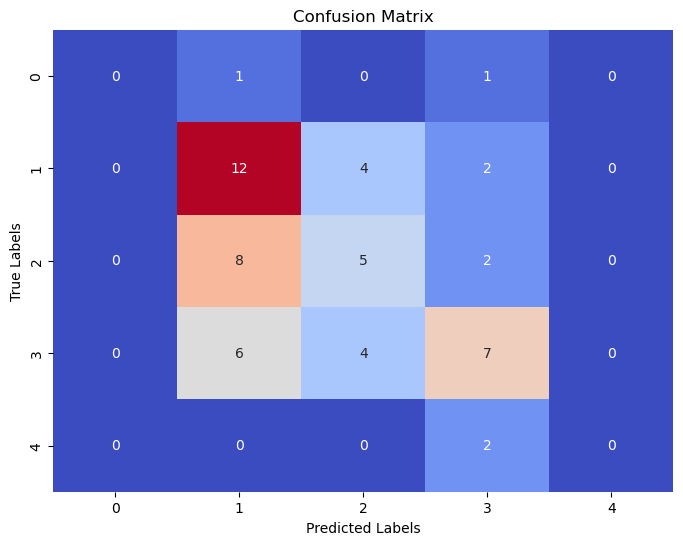

In [11]:
# Splitting the dataset into training and testing sets
X = df_new.drop('RG_yuni_mix', axis=1)
y = df_new['RG_yuni_mix']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Creating the pipeline
rf_pipeline = make_pipeline(StandardScaler(), rf_model)

# Training the model
rf_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Displaying the results
print(f"Random Forest Classifier Performance:\nAccuracy: {accuracy_rf:.2f}\nClassification Report:\n{report_rf}")

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


SUPPORT VECTOR MACHINE (SVM) CLASSIFIER

Support Vector Machine (SVM) Classifier Performance:
Accuracy: 0.37
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.34      0.67      0.45        18
           3       0.00      0.00      0.00        15
           4       0.42      0.47      0.44        17
           5       0.00      0.00      0.00         2

    accuracy                           0.37        54
   macro avg       0.15      0.23      0.18        54
weighted avg       0.25      0.37      0.29        54



C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

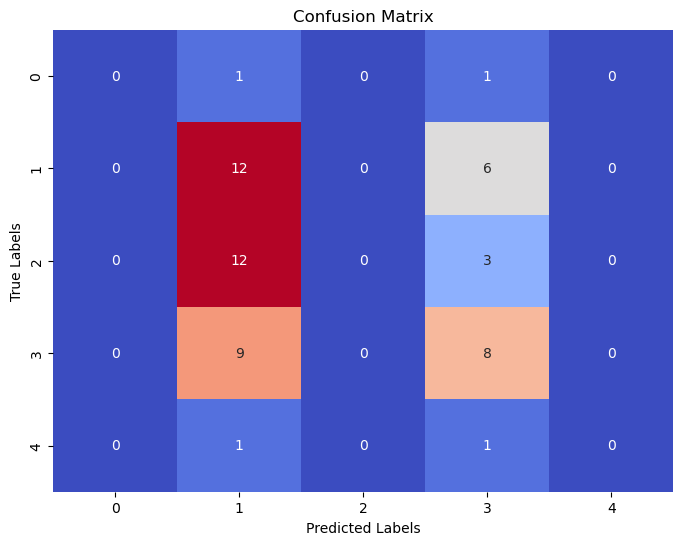

In [12]:
# Support Vector Machine (SVM) Classifier
svm_model = SVC(random_state=42)

# Creating the pipeline
svm_pipeline = make_pipeline(StandardScaler(), svm_model)

# Training the model
svm_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Displaying the results
print(f"Support Vector Machine (SVM) Classifier Performance:\nAccuracy: {accuracy_svm:.2f}\nClassification Report:\n{report_svm}")

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


K-NEAREST NEIGHBORS (KNN) CLASSIFIER

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNeighborsClassifier object
knn = KNeighborsClassifier()

# Create the pipeline
knn_pipeline = make_pipeline(StandardScaler(), knn)

# Train the model
knn_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_pipeline.predict(X_test)

# Calculate performance metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display the results
print(f"K-Nearest Neighbors (KNN) Classifier Performance:\nAccuracy: {accuracy_knn:.2f}\nClassification Report:\n{report_knn}")

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

LOGISTIC REGRESSION CLASSIFIER

Logistic Regression Performance:
Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.25      0.40         4
           2       0.63      0.68      0.66        28
           3       0.33      0.41      0.37        22
           4       0.73      0.64      0.68        25
           5       0.00      0.00      0.00         2

    accuracy                           0.56        81
   macro avg       0.54      0.40      0.42        81
weighted avg       0.58      0.56      0.56        81



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


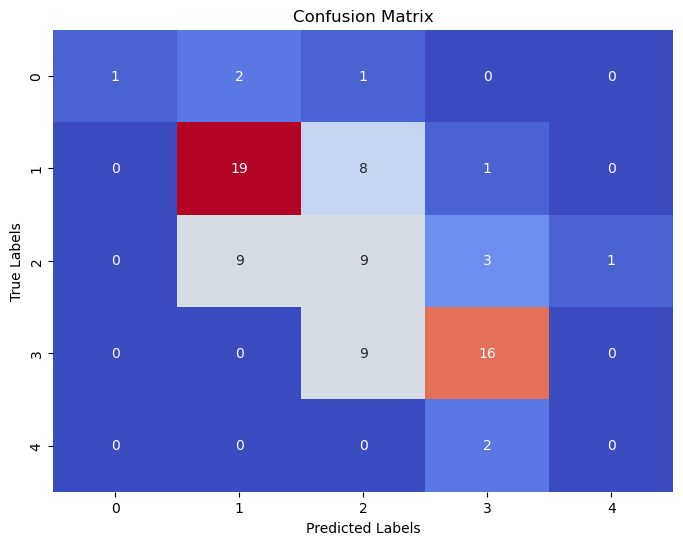

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression classifier
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Create a pipeline
logreg_pipeline = make_pipeline(StandardScaler(), logreg)

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_pipeline.predict(X_test)

# Calculate performance metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Display the results
print(f"Logistic Regression Performance:\nAccuracy: {accuracy_logreg:.2f}\nClassification Report:\n{report_logreg}")

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



DECISION TREE CLASSIFIER

Decision Tree Classifier Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00         2

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



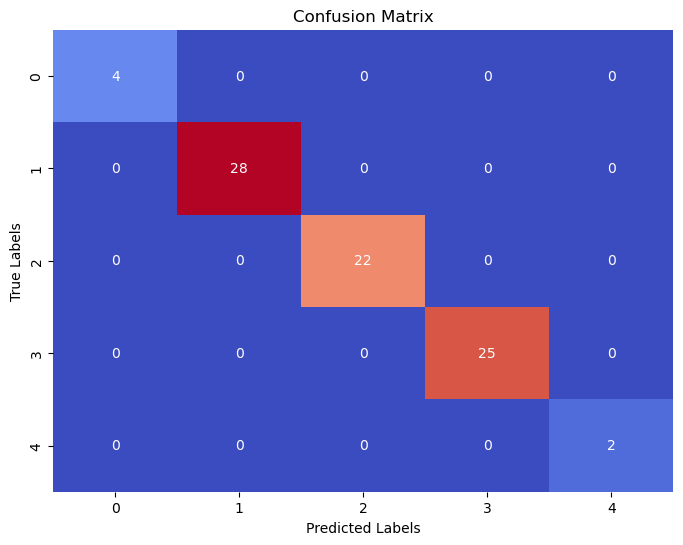

In [ ]:

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Creating the pipeline
dt_pipeline = make_pipeline(StandardScaler(), dt_model)

# Training the model
dt_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Displaying the results
print(f"Decision Tree Classifier Performance:\nAccuracy: {accuracy_dt:.2f}\nClassification Report:\n{report_dt}")

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


LIBRARY OF CLASSIFIERS

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

# Dictionary to store the models and their names
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'SGD Classifier': SGDClassifier(random_state=42)
}

# Splitting the dataset into training and testing sets
X = df_new.drop('RG_yuni_mix', axis=1)
y = df_new['RG_yuni_mix']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store the performance metrics
performance_metrics = {}

# Training and evaluating the models
for name, model in models.items():
    # Making pipelines for standardization and model training
    pipeline = make_pipeline(StandardScaler(), model)

    # Training the model
    pipeline.fit(X_train, y_train)

    # Making predictions
    y_pred = pipeline.predict(X_test)

    # Calculating performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Storing the metrics
    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    }

# Converting performance metrics to a DataFrame for better visualization
performance_df = pd.DataFrame(performance_metrics).T

# Displaying the performance metrics
performance_df.sort_values(by='Accuracy', ascending=False)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr

,Accuracy,Precision,Recall,F1 Score
Decision Tree,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,1.000000,1.000000,1.000000,1.000000
Linear Discriminant Analysis,0.790123,0.785841,0.790123,0.786482
AdaBoost,0.728395,0.576296,0.728395,0.630896
Logistic Regression,0.555556,0.583315,0.555556,0.556145
Random Forest,0.419753,0.391580,0.419753,0.392697
SGD Classifier,0.419753,0.421115,0.419753,0.418374
Support Vector Machine,0.320988,0.208098,0.320988,0.246762
Gaussian Naive Bayes,0.320988,0.356463,0.320988,0.318598
K-Nearest Neighbors,0.283951,0.251601,0.283951,0.258943


In [ ]:
from sklearn.decomposition import PCA

# Splitting the dataset into training and testing sets
X = df_new.drop('RG_yuni_mix', axis=1)
y = df_new['RG_yuni_mix']
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store the performance metrics
performance_metrics = {}

# Training and evaluating the models
for name, model in models.items():
    # Making pipelines for standardization, PCA, and model training
    pipeline2 = make_pipeline(StandardScaler(), PCA(n_components=10), model)

    # Training the model
    pipeline2.fit(X_train_pca, y_train)

    # Making predictions
    y_pred = pipeline2.predict(X_test_pca)

    # Calculating performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Storing the metrics
    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    }

# Converting performance metrics to a DataFrame for better visualization
performance_df2 = pd.DataFrame(performance_metrics).T

# Displaying the performance metrics
performance_df2.sort_values(by='Accuracy', ascending=False)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr

,Accuracy,Precision,Recall,F1 Score
SGD Classifier,0.333333,0.311027,0.333333,0.316699
Support Vector Machine,0.320988,0.208098,0.320988,0.246762
Random Forest,0.308642,0.281433,0.308642,0.291458
Gaussian Naive Bayes,0.308642,0.337325,0.308642,0.312787
Gradient Boosting,0.296296,0.268013,0.296296,0.278831
AdaBoost,0.296296,0.193337,0.296296,0.225207
Linear Discriminant Analysis,0.296296,0.263059,0.296296,0.278359
Decision Tree,0.271605,0.278225,0.271605,0.274415
K-Nearest Neighbors,0.271605,0.248541,0.271605,0.251910
Logistic Regression,0.271605,0.245414,0.271605,0.257562


PCA Scatter Plot for each model

1. Logistic Regression Model

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


InvalidIndexError: (array([False,  True,  True,  True, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True, False, False,  True, False, False,
        True, False, False,  True,  True, False, False,  True,  True,
       False, False, False,  True,  True, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False,  True]), 0)

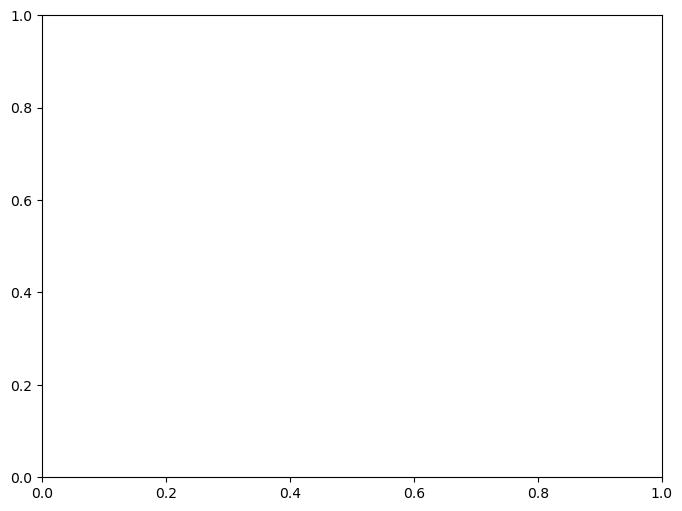

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Splitting the dataset into training and testing sets
X = df_new.drop('RG_yuni_mix', axis=1)
y = df_new['RG_yuni_mix']
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

# Get the indices where the boolean array is True
indices = np.where(y_pred)[0]

# Select the corresponding values from X_test_pca
x_values = X_test_pca[indices, 0]
y_values = X_test_pca[indices, 1]


2. Decision Tree Model


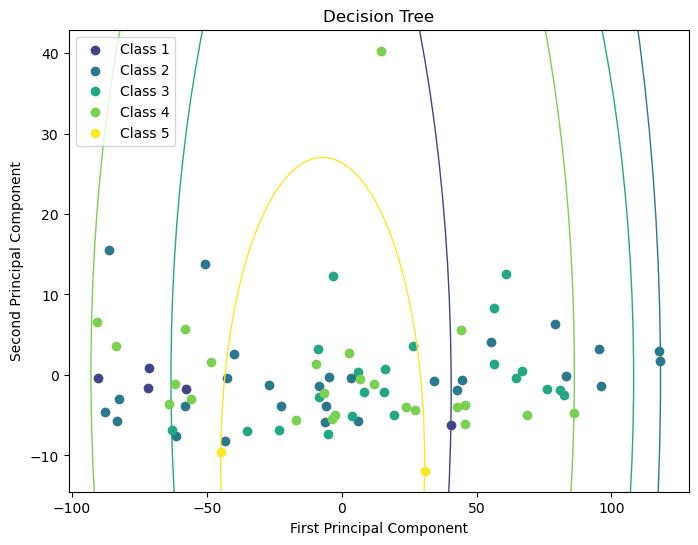

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('Decision Tree')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

3. Random Forest Model


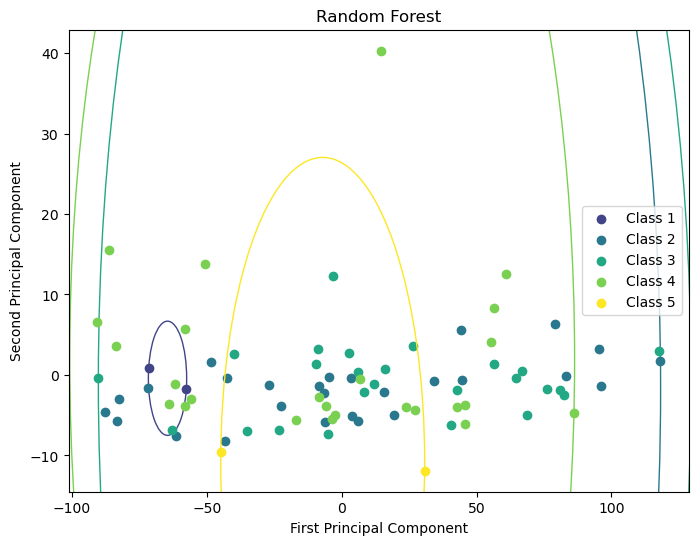

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train the model
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('Random Forest')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

Support Vector Machine (SVM) Model

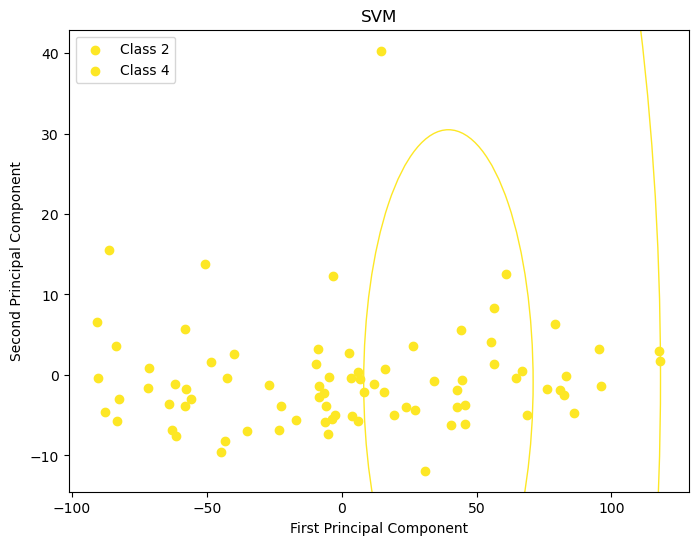

In [ ]:
from sklearn.svm import SVC

# Train the model
model = SVC()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('SVM')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
model = GradientBoostingClassifier()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('Gradient Boosting')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

SGD Classifier Model

In [ ]:
from sklearn.linear_model import SGDClassifier

# Train the model
model = SGDClassifier()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('SGD Classifier')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

Gaussian NB Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train the model
model = GaussianNB()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('Gaussian NB')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

AdaBoost Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Train the model
model = AdaBoostClassifier()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('AdaBoost')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

K-Nearest Neighbors (KNN) Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the model
model = KNeighborsClassifier()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('K-Nearest Neighbors')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

TRIAL OF Orthogonal partial least squares-discriminant analysis (OPLS-DA)

Defaulting to user installation because normal site-packages is not writeable
R^2Y(cum): 0.322297924131809
Q^2(cum): 0.1888749188186687


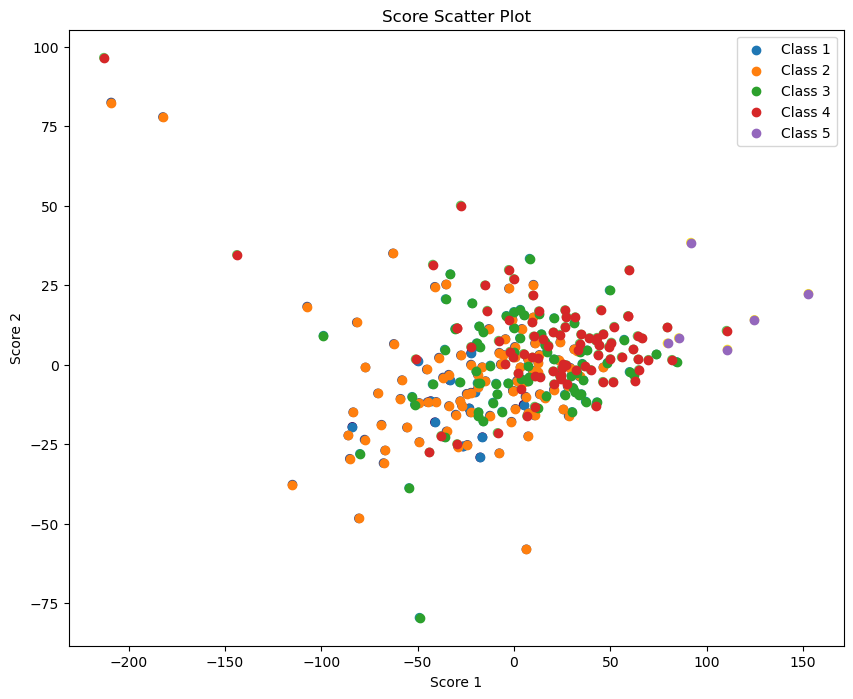

In [ ]:
!pip install pyopls

from pyopls import OPLS
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are your data
X = df_new.drop('RG_yuni_mix', axis=1)
y = df_new['RG_yuni_mix']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Create an OPLS model with one predictive component and one orthogonal component
opls = OPLS(1)

# Remove the orthogonal signal
X_opls = opls.fit_transform(X_scaled, y_scaled)

# Now, you can use the filtered data in any classifier, for example, PLSRegression
pls2 = PLSRegression(n_components=2)
pls2.fit(X_opls, y_scaled)

# Predict the response variable
y_pred = pls2.predict(X_opls)

# Calculate R^2Y
R2Y = r2_score(y_scaled, y_pred)


# Calculate Q^2 using cross-validation
y_cv = cross_val_predict(pls2, X_opls, y_scaled, cv=10)
Q2 = r2_score(y_scaled, y_cv)

# Print the results
print(f"R^2Y(cum): {R2Y}")
print(f"Q^2(cum): {Q2}")

# Get the unique class labels in your data
classes = np.unique(y)

# Plot the scores
plt.figure(figsize=(10, 8))
plt.scatter(pls2.x_scores_[:, 0], pls2.x_scores_[:, 1], c=y)

# Assuming 'classes' is a list of unique class labels in your data
for i, class_label in enumerate(classes):
    plt.scatter(pls2.x_scores_[y == class_label, 0], pls2.x_scores_[y == class_label, 1], label=f'Class {class_label}')


plt.xlabel('Score 1')
plt.ylabel('Score 2')
plt.title('Score Scatter Plot')
plt.legend()  # Add a legend instead of a colorbar
plt.show()

Hierarchical Cluster Analysis (HCA) on the OPLS-DA scores

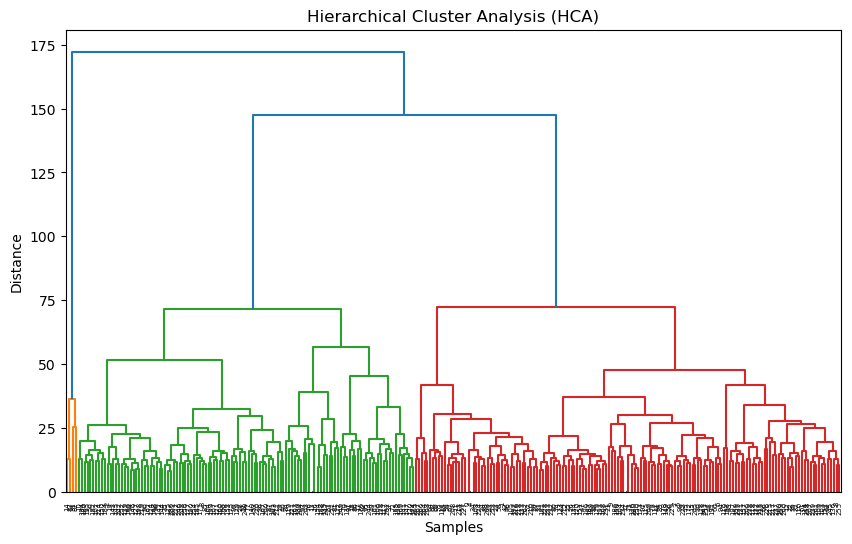

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(X_opls, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Cluster Analysis (HCA)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
